# Exploring data visualization with BLS unemployment data

In this notebook I'm exploring data visualization using the Bureau of Labor Statistics data on unemployment that I learned while doing DataQuest. I'll explore the data as well as ways to visualize it better. 

In [1]:
%matplotlib inline
import numpy as np

In [2]:
import pandas as pd
unrate = pd.read_csv("Desktop/unrate.csv")
unrate['DATE'] = pd.to_datetime(unrate['DATE'])
unrate.head(12)


,DATE,VALUE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5
5,1948-06-01,3.6
6,1948-07-01,3.6
7,1948-08-01,3.9
8,1948-09-01,3.8
9,1948-10-01,3.7


The first twelve rows reflect unemployment from January to December 1948. Unemployment ranged from 3.4 to 4.0. The highest unemployment rate was reached in March and December, and the lowest rate was reached in January.

We'll continue looking at the trends with more data.

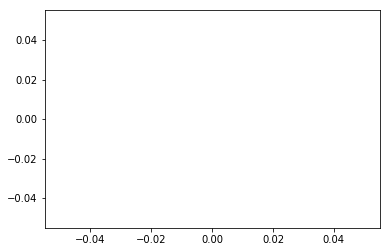

In [3]:
import matplotlib.pyplot as plt
plt.plot()
plt.show()

This is the default plot/show chart for matplotlib.  The x and y axis rang from -.06 to .06, there are no grid lines, and no data included. Matplotlib is a greatlibrary to use because it allows you to quickly create common plots using high-level functions, extensively edit/customize plots, and creat your own plots.

Now, we'll make this plot our own.

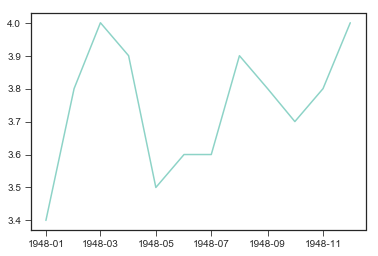

In [13]:
plt.plot(unrate.head(12)['DATE'], unrate.head(12)['VALUE'])
plt.show()

We did it! This chart shows the information in the table we made earlier, just in a nicer to read chart. 

Below is an edit to the chart we can do for better readability. You can turn the x-axis by any degree you wish. For best readability, for example purposes, I'll turn it 90 degrees. 

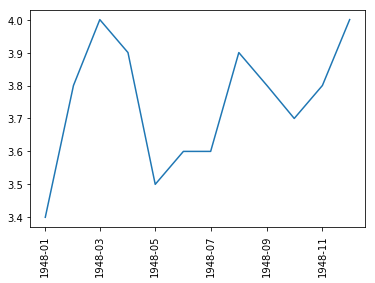

In [5]:
plt.plot(unrate.head(12)['DATE'], unrate.head(12)['VALUE'])
plt.xticks(rotation=90)
plt.show()

Next we'll add a title and labels to our chart. 

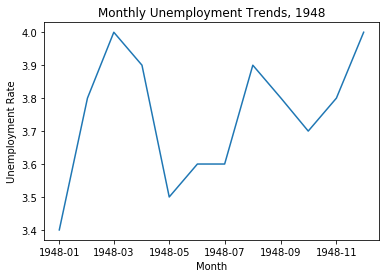

In [6]:
plt.plot(unrate.head(12)['DATE'], unrate.head(12)['VALUE'])

plt.xlabel("Month")
plt.ylabel("Unemployment Rate")
plt.title("Monthly Unemployment Trends, 1948") 

plt.show()

We can even change the stle elements. Next, we'll use a 'dark background' style. To see all available styles, 'print(plt.style.available)'

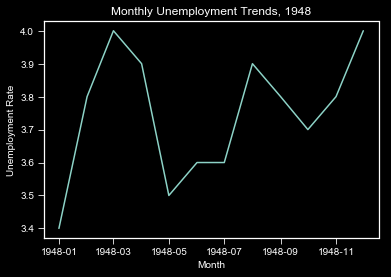

In [15]:
plt.plot(unrate.head(12)['DATE'], unrate.head(12)['VALUE'])

plt.xlabel("Month")
plt.ylabel("Unemployment Rate")
plt.title("Monthly Unemployment Trends, 1948") 

plt.style.use('dark_background')

plt.show()

Now that we've explored that a bit, we're going to make a chart for the entire dataset.

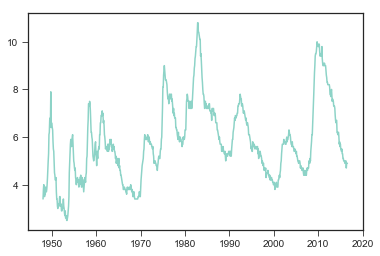

In [17]:
plt.plot(unrate['DATE'], unrate['VALUE'])
plt.style.use('seaborn-ticks')
plt.show()

Over 70 years, we can see the larger trend versus just looking at 10 years of data. We can see in the mid 80's and just after 2010 were some of the highest unemployment rates. It is also important to note that our firstfew charts were between 3.4 and 4.0, a relatively low number. This chart is between 3 and 10. The two heights of unemployment reached ten. 

# Multiple plots

Using matplotlib, you can make multiple plots at the same time! The three key components are the figure, asex, and symbols.

Figure object: top level container for all the plot elements  https://matplotlib.org/api/figure_api.html#matplotlib.figure.Figure

Axes object: The Axes contains most of the figure elements: Axis, Tick, Line2D, Text, Polygon, etc., and sets the coordinate system.
https://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes

Symbols: the patterns created on the plot via the axes method



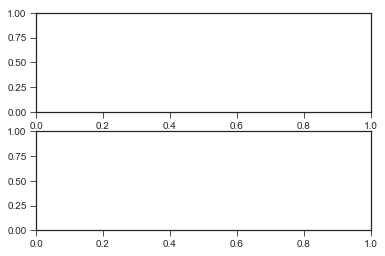

In [9]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
plt.show()

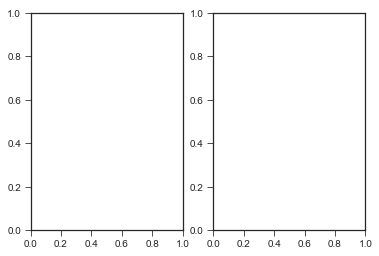

In [10]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

plt.show()

Above is the code to create multiple subplots in different column or rows. More on that here: https://matplotlib.org/2.1.2/api/_as_gen/matplotlib.pyplot.subplot.html#matplotlib.pyplot.subplot.

Below are two subplots  that show data from 1948 in one, and 1949 in the other. You can see how having them next to each other is useful for comparison. 

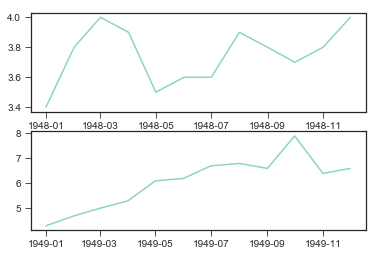

In [11]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.plot(unrate['DATE'][:12], unrate['VALUE'][:12])
ax2.plot(unrate['DATE'][12:24], unrate['VALUE'][12:24])

plt.show()

For better readability, we can specify the size of the figure. When creating the figure, just add figsize=(width,height) in the parenthesis.

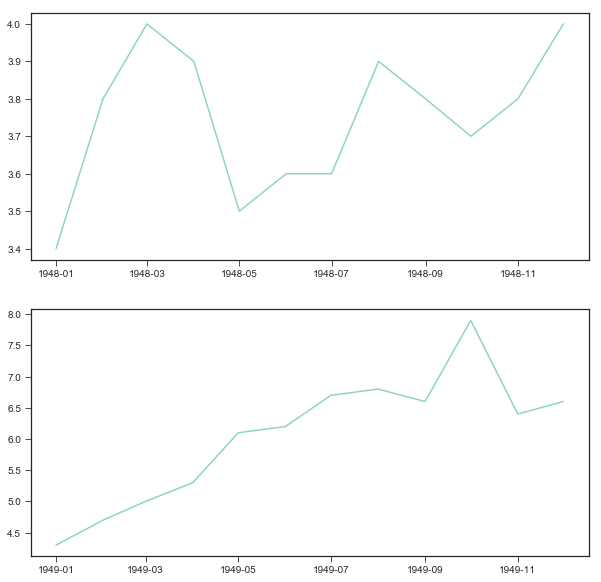

In [12]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.plot(unrate['DATE'][:12], unrate['VALUE'][:12])
ax2.plot(unrate['DATE'][12:24], unrate['VALUE'][12:24])

plt.show()

It doesn't have to be this large of course, but it can be whatever size you specify. We'll get into more readability options further on. 

Typically the point of putting plots close together like this is to compare them or look for comonalities. In this case, is there a pattern between months in unemployment? It does not appear so at least between these two years. 

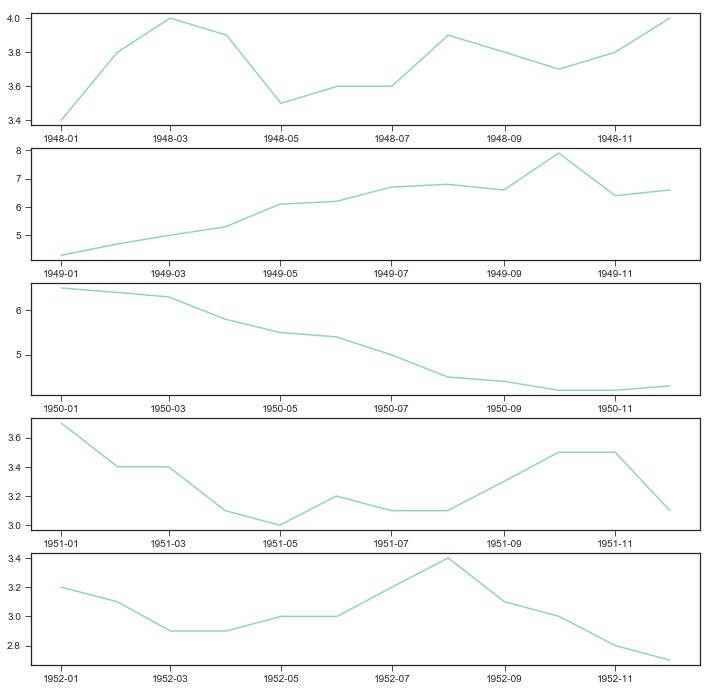

In [18]:
fig = plt.figure(figsize=(12,12))

for i in range(5):
    ax = fig.add_subplot(5,1,i+1)
    start_index = i*12
    end_index = (i+1)*12
    subset = unrate[start_index:end_index]
    ax.plot(subset['DATE'],subset['VALUE'])


plt.show()

Here is another way of creating multiple plots. It is the same code, but we use a for loop to reduce the amount of busy work and potential errors. 

This is five years of data from 1948 to 1952. Do you notice any trends?

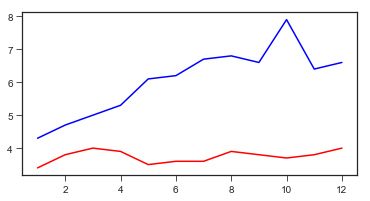

In [19]:
unrate['MONTH'] = unrate['DATE'].dt.month
fig = plt.figure(figsize=(6,3))
ax1 = plt.plot(unrate['MONTH'][:12],unrate['VALUE'][:12],c='red')
ax2 = plt.plot(unrate['MONTH'][12:24],unrate['VALUE'][12:24], c='blue')

plt.show()

Here we show two lines on the same chart. It's even easier to compare! The red line is 1948 data and the blue line is 1949. The code is above. Basically, just use pyplot.plot() multiple times in one figure. You can assigne each line a color by using 'c='.

I also changed the months to an integer for better readability in line one of the code. 

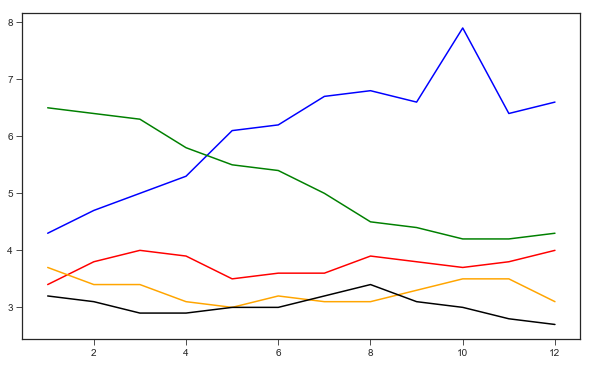

In [20]:
unrate['MONTH'] = unrate['DATE'].dt.month 
fig = plt.figure(figsize=(10,6))
colors = ['red','blue','green','orange','black']

for i in range(5):
    start_index = i*12
    end_index = (i+1)*12
    subset = unrate[start_index:end_index]
    plt.plot(subset['MONTH'],subset['VALUE'], c=colors[i])

We can also create legends in plots, which would be incredibly helpful in this case. The two main points in creating a legend are 'plt.legend()', this is where you can specify legend location. 

'pyplot.plot()' is also important because it is where you specify your label.

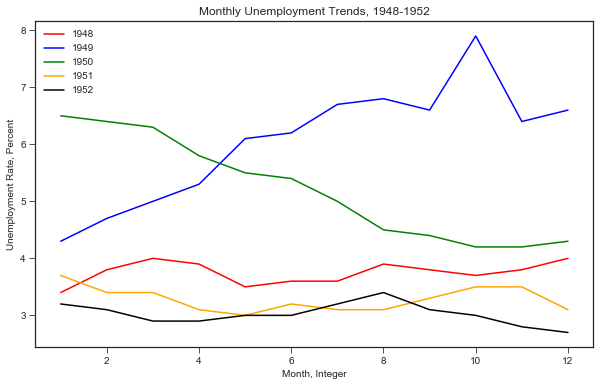

In [22]:
fig = plt.figure(figsize=(10,6))
colors = ['red', 'blue', 'green', 'orange', 'black']
labels = ['1948','1949','1950','1951','1952']
for i in range(5):
    start_index = i*12
    end_index = (i+1)*12
    subset = unrate[start_index:end_index]
    plt.plot(subset['MONTH'], subset['VALUE'], c=colors[i], label=labels[i])
    
plt.legend(loc='upper left')

plt.title("Monthly Unemployment Trends, 1948-1952")
plt.xlabel("Month, Integer")
plt.ylabel("Unemployment Rate, Percent")

plt.show()

These are the basics of using Matplotlib! For more information and examples, visit their website: https://matplotlib.org/index.html#